In [1]:
import pandas as pd
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras import initializers

Using TensorFlow backend.


In [2]:
pd_target = pd.read_csv('target.csv', sep=' ')
pd_non_target = pd.read_csv('non_target.csv', sep=' ')
np_target = pd_target.values
np_non_target = pd_non_target.values

target = np_target
non_target = np_non_target

np_label = np.ones(len(target))
np_non_label = np.zeros(len(non_target))

train = np.concatenate((target, non_target),axis=0) 
label = np.append(np_label, np_non_label)

In [3]:
print(len(train))
print(len(train[0]))
print(len(label))

102
59
102


In [4]:
indices = np.random.permutation(train.shape[0])
train_data = train[indices]
train_targets = label[indices]

In [7]:
def build_model():
    model = models.Sequential()
    l2 = regularizers.l2(0.1)
    init = initializers.he_uniform()
    model.add(layers.Dense(input_dim=len(train[0]), units=1024, activation='relu'
                            ,kernel_regularizer=l2
                            ,kernel_initializer=init))  
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=1024, activation='relu'
                                ,kernel_regularizer=l2
                                ,kernel_initializer=init))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=1024, activation='relu'
                                ,kernel_regularizer=l2
                                ,kernel_initializer=init))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(units=1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adadelta(), metrics=['accuracy'])
    return model

In [8]:
num_epochs = 200
k = 3
num_val_samples = len(train_data) // k
acc_historys = []
val_acc_historys = []
loss_historys = []
val_loss_historys = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=5, verbose=1)
    
    acc_history = history.history['acc']
    val_acc_history = history.history['val_acc']
    acc_historys.append(acc_history)
    val_acc_historys.append(val_acc_history)
    
    loss_history = history.history['loss']
    val_loss_history = history.history['val_loss']
    loss_historys.append(loss_history)
    val_loss_historys.append(val_loss_history)

processing fold # 0
Train on 68 samples, validate on 34 samples
Epoch 1/200
68/68 [==============================] - 1s 17ms/step - loss: 500.0249 - acc: 0.5735 - val_loss: 385.3693 - val_acc: 0.9118
Epoch 2/200
68/68 [==============================] - 0s 4ms/step - loss: 322.4790 - acc: 0.8235 - val_loss: 259.1324 - val_acc: 0.7647
Epoch 3/200
68/68 [==============================] - 0s 4ms/step - loss: 222.2526 - acc: 0.7500 - val_loss: 183.9518 - val_acc: 0.8824
Epoch 4/200
68/68 [==============================] - 0s 4ms/step - loss: 160.6621 - acc: 0.8529 - val_loss: 135.9343 - val_acc: 0.8824
Epoch 5/200
68/68 [==============================] - 0s 4ms/step - loss: 120.2795 - acc: 0.8382 - val_loss: 103.3872 - val_acc: 0.7647
Epoch 6/200
68/68 [==============================] - 0s 4ms/step - loss: 92.1666 - acc: 0.8824 - val_loss: 79.9924 - val_acc: 0.8824
Epoch 7/200
68/68 [==============================] - 0s 4ms/step - loss: 71.8321 - acc: 0.8382 - val_loss: 62.8295 - val_acc: 0

68/68 [==============================] - 0s 4ms/step - loss: 0.5133 - acc: 0.8529 - val_loss: 0.5698 - val_acc: 0.8529
Epoch 63/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5065 - acc: 0.8824 - val_loss: 0.6425 - val_acc: 0.8235
Epoch 64/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5535 - acc: 0.8529 - val_loss: 0.6771 - val_acc: 0.8529
Epoch 65/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5443 - acc: 0.8676 - val_loss: 0.5551 - val_acc: 0.8529
Epoch 66/200
68/68 [==============================] - 0s 5ms/step - loss: 0.4919 - acc: 0.8824 - val_loss: 0.7090 - val_acc: 0.8235
Epoch 67/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4980 - acc: 0.8971 - val_loss: 0.5571 - val_acc: 0.8529
Epoch 68/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4786 - acc: 0.9118 - val_loss: 0.5300 - val_acc: 0.8529
Epoch 69/200
68/68 [==============================] - 0s 5ms/step - loss: 0.4963 - acc: 0

Epoch 124/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4474 - acc: 0.9265 - val_loss: 0.5463 - val_acc: 0.8824
Epoch 125/200
68/68 [==============================] - 0s 5ms/step - loss: 0.4727 - acc: 0.9118 - val_loss: 0.5769 - val_acc: 0.8824
Epoch 126/200
68/68 [==============================] - 0s 5ms/step - loss: 0.4889 - acc: 0.8971 - val_loss: 0.5241 - val_acc: 0.8824
Epoch 127/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4304 - acc: 0.8824 - val_loss: 0.5357 - val_acc: 0.8824
Epoch 128/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4411 - acc: 0.9118 - val_loss: 0.5251 - val_acc: 0.8529
Epoch 129/200
68/68 [==============================] - 0s 5ms/step - loss: 0.4475 - acc: 0.9265 - val_loss: 0.6143 - val_acc: 0.8235
Epoch 130/200
68/68 [==============================] - 0s 5ms/step - loss: 0.4387 - acc: 0.8971 - val_loss: 0.5421 - val_acc: 0.8824
Epoch 131/200
68/68 [==============================] - 0s 4ms/step - 

68/68 [==============================] - 0s 5ms/step - loss: 0.4069 - acc: 0.9118 - val_loss: 0.4948 - val_acc: 0.8235
Epoch 186/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4179 - acc: 0.9118 - val_loss: 0.4985 - val_acc: 0.8529
Epoch 187/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4530 - acc: 0.8824 - val_loss: 0.5543 - val_acc: 0.8235
Epoch 188/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4803 - acc: 0.8676 - val_loss: 0.6079 - val_acc: 0.8235
Epoch 189/200
68/68 [==============================] - 0s 5ms/step - loss: 0.4807 - acc: 0.8971 - val_loss: 0.5279 - val_acc: 0.8824
Epoch 190/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4118 - acc: 0.9265 - val_loss: 0.5315 - val_acc: 0.8824
Epoch 191/200
68/68 [==============================] - 0s 5ms/step - loss: 0.3899 - acc: 0.9265 - val_loss: 0.5326 - val_acc: 0.8529
Epoch 192/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4281 -

68/68 [==============================] - 0s 4ms/step - loss: 0.5025 - acc: 0.9412 - val_loss: 0.6751 - val_acc: 0.8529
Epoch 47/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5537 - acc: 0.8824 - val_loss: 0.6490 - val_acc: 0.8529
Epoch 48/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5193 - acc: 0.8676 - val_loss: 0.8005 - val_acc: 0.7353
Epoch 49/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5535 - acc: 0.8676 - val_loss: 0.6547 - val_acc: 0.8235
Epoch 50/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5647 - acc: 0.8971 - val_loss: 0.6978 - val_acc: 0.7647
Epoch 51/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5094 - acc: 0.9118 - val_loss: 0.6775 - val_acc: 0.7647
Epoch 52/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4855 - acc: 0.9118 - val_loss: 0.6245 - val_acc: 0.8529
Epoch 53/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5197 - acc: 0

68/68 [==============================] - 0s 4ms/step - loss: 0.4772 - acc: 0.8676 - val_loss: 0.6403 - val_acc: 0.8235
Epoch 109/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4339 - acc: 0.9265 - val_loss: 0.5688 - val_acc: 0.8529
Epoch 110/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4169 - acc: 0.9412 - val_loss: 0.7197 - val_acc: 0.7353
Epoch 111/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4736 - acc: 0.9265 - val_loss: 0.5972 - val_acc: 0.7941
Epoch 112/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4362 - acc: 0.8971 - val_loss: 0.5907 - val_acc: 0.8529
Epoch 113/200
68/68 [==============================] - 0s 4ms/step - loss: 0.3981 - acc: 0.9706 - val_loss: 0.5652 - val_acc: 0.8235
Epoch 114/200
68/68 [==============================] - 0s 4ms/step - loss: 0.3816 - acc: 0.9559 - val_loss: 0.5782 - val_acc: 0.8529
Epoch 115/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4574 -

Epoch 170/200
68/68 [==============================] - 0s 3ms/step - loss: 0.4119 - acc: 0.9118 - val_loss: 0.5786 - val_acc: 0.8235
Epoch 171/200
68/68 [==============================] - 0s 3ms/step - loss: 0.4069 - acc: 0.8824 - val_loss: 0.5642 - val_acc: 0.8529
Epoch 172/200
68/68 [==============================] - 0s 3ms/step - loss: 0.3964 - acc: 0.8824 - val_loss: 0.6012 - val_acc: 0.8235
Epoch 173/200
68/68 [==============================] - 0s 3ms/step - loss: 0.4464 - acc: 0.8971 - val_loss: 0.5861 - val_acc: 0.8235
Epoch 174/200
68/68 [==============================] - 0s 3ms/step - loss: 0.4194 - acc: 0.9265 - val_loss: 0.5728 - val_acc: 0.7941
Epoch 175/200
68/68 [==============================] - 0s 4ms/step - loss: 0.3965 - acc: 0.9118 - val_loss: 0.5586 - val_acc: 0.8235
Epoch 176/200
68/68 [==============================] - 0s 3ms/step - loss: 0.4359 - acc: 0.9265 - val_loss: 0.5782 - val_acc: 0.8529
Epoch 177/200
68/68 [==============================] - 0s 3ms/step - 

68/68 [==============================] - 0s 3ms/step - loss: 0.6823 - acc: 0.8676 - val_loss: 0.4951 - val_acc: 0.9412
Epoch 32/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6690 - acc: 0.8529 - val_loss: 0.5022 - val_acc: 0.9118
Epoch 33/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6803 - acc: 0.7941 - val_loss: 0.5033 - val_acc: 0.9412
Epoch 34/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6500 - acc: 0.8382 - val_loss: 0.5083 - val_acc: 0.9706
Epoch 35/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6702 - acc: 0.8382 - val_loss: 0.4840 - val_acc: 0.9412
Epoch 36/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6652 - acc: 0.7941 - val_loss: 0.4742 - val_acc: 0.9412
Epoch 37/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6555 - acc: 0.8529 - val_loss: 0.4808 - val_acc: 0.9412
Epoch 38/200
68/68 [==============================] - 0s 4ms/step - loss: 0.6237 - acc: 0

68/68 [==============================] - 0s 4ms/step - loss: 0.6145 - acc: 0.8676 - val_loss: 0.4097 - val_acc: 0.9412
Epoch 94/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5458 - acc: 0.8824 - val_loss: 0.4004 - val_acc: 0.9706
Epoch 95/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5565 - acc: 0.8529 - val_loss: 0.4028 - val_acc: 0.9706
Epoch 96/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5899 - acc: 0.8529 - val_loss: 0.3921 - val_acc: 0.9706
Epoch 97/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5961 - acc: 0.7794 - val_loss: 0.3912 - val_acc: 0.9706
Epoch 98/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5590 - acc: 0.8824 - val_loss: 0.3869 - val_acc: 0.9412
Epoch 99/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5429 - acc: 0.8382 - val_loss: 0.3872 - val_acc: 0.9706
Epoch 100/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5338 - acc: 

Epoch 155/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5602 - acc: 0.8676 - val_loss: 0.3749 - val_acc: 0.9706
Epoch 156/200
68/68 [==============================] - 0s 3ms/step - loss: 0.6100 - acc: 0.8088 - val_loss: 0.3727 - val_acc: 0.9412
Epoch 157/200
68/68 [==============================] - 0s 4ms/step - loss: 0.5291 - acc: 0.8971 - val_loss: 0.3666 - val_acc: 0.9412
Epoch 158/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4994 - acc: 0.9118 - val_loss: 0.3631 - val_acc: 0.9412
Epoch 159/200
68/68 [==============================] - 0s 3ms/step - loss: 0.5014 - acc: 0.8676 - val_loss: 0.3553 - val_acc: 0.9706
Epoch 160/200
68/68 [==============================] - 0s 3ms/step - loss: 0.5346 - acc: 0.8382 - val_loss: 0.3616 - val_acc: 0.9706
Epoch 161/200
68/68 [==============================] - 0s 4ms/step - loss: 0.4757 - acc: 0.8824 - val_loss: 0.3696 - val_acc: 0.9412
Epoch 162/200
68/68 [==============================] - 0s 4ms/step - 

In [9]:
# 评估模型
scores = model.evaluate(train_data, train_targets, verbose=0)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

acc: 92.16%


In [10]:
# 为图片提供数据源
average_acc_history = [
    np.mean([x[i] for x in acc_historys]) for i in range(num_epochs)]
average_val_acc_history = [
    np.mean([x[i] for x in val_acc_historys]) for i in range(num_epochs)]

average_loss_history = [
    np.mean([x[i] for x in loss_historys]) for i in range(num_epochs)]
average_val_loss_history = [
    np.mean([x[i] for x in val_loss_historys]) for i in range(num_epochs)]

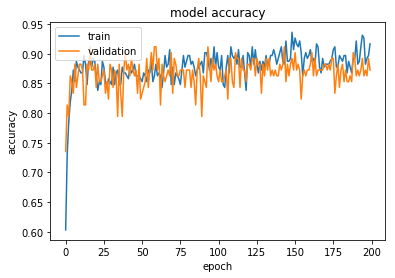

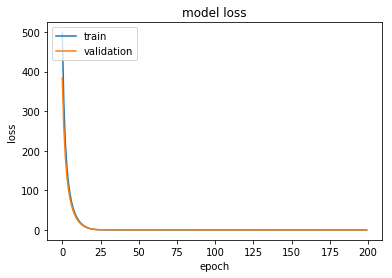

In [11]:
from matplotlib import pyplot as plt
%matplotlib inline

# accuracy的历史
plt.plot(average_acc_history)
plt.plot(average_val_acc_history)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# loss的历史
plt.plot(average_loss_history)
plt.plot(average_val_loss_history)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()